Helpful resources:
https://github.com/simoninithomas/Deep_reinforcement_learning_Course/blob/master/Q%20learning/FrozenLake/Q%20Learning%20with%20FrozenLake.ipynb



In [221]:
import gym
import numpy as np
import random
import torch
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%run main_functions.ipynb

In [222]:
og_4x4 = ['SFFF','FHFH','FFFH','HFFG']

In [223]:
# Inverse Env. 
og_4x4_inv =[''.join([word[i] for word in og_4x4])  for i in range(len(og_4x4[0]))]

In [224]:
%matplotlib inline

In [225]:
env = gym.make('FrozenLake-v1', is_slippery=False, desc = og_4x4)
env.reset()
# visualize 4x4 frozen lake
env.render()

env_inv = gym.make('FrozenLake-v1', is_slippery=False, desc = og_4x4_inv)

env_inv.reset()
# visualize 4x4 frozen lake
env_inv.render()

In [226]:
# Total number of States and Actions
n_states = env.observation_space.n
n_actions = env.action_space.n
n_rows = 4
n_cols = 4
print( "States = ", n_states)
print( "Actions = ", n_actions)

States =  16
Actions =  4


In [227]:
##assign index to each state using state-matrix
state_matrix = np.arange(0,n_states).reshape(n_rows,n_cols)

## Check transfer

In [233]:
Q, Q_new, rewards_total,steps_total,  rewards_total_inv,steps_total_inv = check_transfer(env,env_inv, num_episodes = 5000, num_episodes2 = 55000)

Episode: 0 Reward: 0.0 Steps Taken: 11 Terminal State: F, Epsilon: 0.7992
Episode: 10 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.7912438682636309
Episode: 20 Reward: 0.0 Steps Taken: 10 Terminal State: H, Epsilon: 0.7833669407717642
Episode: 30 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.7755684290366581
Episode: 40 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.7678475524200608
Episode: 50 Reward: 0.0 Steps Taken: 5 Terminal State: F, Epsilon: 0.7602035380550674
Episode: 60 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.7526356207687559
Episode: 70 Reward: 0.0 Steps Taken: 3 Terminal State: H, Epsilon: 0.7451430430055925
Episode: 80 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.7377250547515992
Episode: 90 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.7303809134592769
Episode: 100 Reward: 0.0 Steps Taken: 9 Terminal State: H, Epsilon: 0.7231098839732764
Episode: 110 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsil

Episode: 950 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.3089365482771137
Episode: 960 Reward: 0.0 Steps Taken: 3 Terminal State: H, Epsilon: 0.30586104793142815
Episode: 970 Reward: 0.0 Steps Taken: 3 Terminal State: H, Epsilon: 0.30281616456009885
Episode: 980 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.29980159336747847
Episode: 990 Reward: 0.0 Steps Taken: 3 Terminal State: H, Epsilon: 0.29681703259219694
Episode: 1000 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.2938621834769546
Episode: 1010 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.2909367502386166
Episode: 1020 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.28804044003860463
Episode: 1030 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.28517296295358346
Episode: 1040 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.28233403194643947
Episode: 1050 Reward: 0.0 Steps Taken: 3 Terminal State: H, Epsilon: 0.27952336283754786
Episode: 1060 Reward: 0.0 Ste

Episode: 1970 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.11134411825543995
Episode: 1980 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.11023567422026707
Episode: 1990 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.10913826487824516
Episode: 2000 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.108051780377682
Episode: 2010 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.10697611196047219
Episode: 2020 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.1059111519512103
Episode: 2030 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.10485679374641242
Episode: 2040 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.10381293180384518
Episode: 2050 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.10277946163196065
Episode: 2060 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.1017562797794369
Episode: 2070 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.10074328382482223
Episode: 2080 Reward: 0.0

Episode: 3010 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 3020 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 3030 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 3040 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 3050 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 3060 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 3070 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 3080 Reward: 0.0 Steps Taken: 3 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 3090 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 3100 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 3110 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 3120 Reward:

Episode: 3970 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 3980 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 3990 Reward: 0.0 Steps Taken: 3 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 4000 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 4010 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 4020 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 4030 Reward: 0.0 Steps Taken: 3 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 4040 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 4050 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 4060 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 4070 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 4080 Reward:

Episode: 0 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.7992
Episode: 10 Reward: 0.0 Steps Taken: 7 Terminal State: H, Epsilon: 0.7912438682636309
Episode: 20 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.7833669407717642
Episode: 30 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.7755684290366581
Episode: 40 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.7678475524200608
Episode: 50 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.7602035380550674
Episode: 60 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.7526356207687559
Episode: 70 Reward: 0.0 Steps Taken: 9 Terminal State: H, Epsilon: 0.7451430430055925
Episode: 80 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.7377250547515992
Episode: 90 Reward: 0.0 Steps Taken: 11 Terminal State: H, Epsilon: 0.7303809134592769
Episode: 100 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.7231098839732764
Episode: 110 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilo

Episode: 980 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.29980159336747847
Episode: 990 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.29681703259219694
Episode: 1000 Reward: 0.0 Steps Taken: 3 Terminal State: H, Epsilon: 0.2938621834769546
Episode: 1010 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.2909367502386166
Episode: 1020 Reward: 1.0 Steps Taken: 14 Terminal State: G, Epsilon: 0.28804044003860463
Episode: 1030 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.28517296295358346
Episode: 1040 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.28233403194643947
Episode: 1050 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.27952336283754786
Episode: 1060 Reward: 0.0 Steps Taken: 3 Terminal State: H, Epsilon: 0.2767406742763261
Episode: 1070 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.27398568771307025
Episode: 1080 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.2712581273710722
Episode: 1090 Reward: 0.0 

Episode: 1910 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.1182328033037494
Episode: 1920 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.11705578158372329
Episode: 1930 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.11589047725591577
Episode: 1940 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.11473677367228365
Episode: 1950 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.11359455534602904
Episode: 1960 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.11246370794003893
Episode: 1970 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.11134411825543995
Episode: 1980 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.11023567422026707
Episode: 1990 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.10913826487824516
Episode: 2000 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.108051780377682
Episode: 2010 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.10697611196047219
Episode: 2020 Reward: 1

Episode: 2870 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 2880 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2890 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2900 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2910 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2920 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2930 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2940 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2950 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2960 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2970 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2980 Reward:

Episode: 3820 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3830 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3840 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3850 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3860 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3870 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3880 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3890 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3900 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3910 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3920 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3930 Reward

Episode: 4790 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4800 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4810 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 4820 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 4830 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4840 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4850 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4860 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4870 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4880 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4890 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4900 Reward:

Episode: 5760 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5770 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5780 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5790 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5800 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5810 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5820 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5830 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 5840 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5850 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5860 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5870 Reward:

Episode: 6750 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6760 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6770 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6780 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 6790 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6800 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6810 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 6820 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6830 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6840 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 6850 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6860 Reward:

Episode: 7680 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 7690 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7700 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 7710 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7720 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7730 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 7740 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 7750 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 7760 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7770 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7780 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7790 Reward:

Episode: 8650 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8660 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8670 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8680 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8690 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8700 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8710 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8720 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8730 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8740 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8750 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8760 Reward:

Episode: 9570 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9580 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9590 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9600 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9610 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9620 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9630 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9640 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 9650 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9660 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9670 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9680 Reward:

Episode: 10480 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 10490 Reward: 1.0 Steps Taken: 9 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 10500 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 10510 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 10520 Reward: 1.0 Steps Taken: 9 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 10530 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 10540 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 10550 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 10560 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 10570 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 10580 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 1

Episode: 11420 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 11430 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 11440 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 11450 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 11460 Reward: 0.0 Steps Taken: 7 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 11470 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 11480 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 11490 Reward: 1.0 Steps Taken: 9 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 11500 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 11510 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 11520 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 1

Episode: 12380 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 12390 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 12400 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 12410 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 12420 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 12430 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 12440 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 12450 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 12460 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 12470 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 12480 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 1

Episode: 13310 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 13320 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 13330 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 13340 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 13350 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 13360 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 13370 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 13380 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 13390 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 13400 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 13410 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 

Episode: 14230 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 14240 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 14250 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 14260 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 14270 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 14280 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 14290 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 14300 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 14310 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 14320 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 14330 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 1

Episode: 15170 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 15180 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 15190 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 15200 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 15210 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 15220 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 15230 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 15240 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 15250 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 15260 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 15270 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 1

Episode: 16120 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 16130 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 16140 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 16150 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 16160 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 16170 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 16180 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 16190 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 16200 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 16210 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 16220 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 

Episode: 17070 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 17080 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 17090 Reward: 1.0 Steps Taken: 9 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 17100 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 17110 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 17120 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 17130 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 17140 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 17150 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 17160 Reward: 1.0 Steps Taken: 11 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 17170 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 

Episode: 18000 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 18010 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 18020 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 18030 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 18040 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 18050 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 18060 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 18070 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 18080 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 18090 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 18100 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 1

Episode: 18910 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 18920 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 18930 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 18940 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 18950 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 18960 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 18970 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 18980 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 18990 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 19000 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 19010 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 1

Episode: 19840 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 19850 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 19860 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 19870 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 19880 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 19890 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 19900 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 19910 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 19920 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 19930 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 19940 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 1

Episode: 20760 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 20770 Reward: 1.0 Steps Taken: 11 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 20780 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 20790 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 20800 Reward: 1.0 Steps Taken: 9 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 20810 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 20820 Reward: 1.0 Steps Taken: 9 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 20830 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 20840 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 20850 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 20860 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode:

Episode: 21680 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 21690 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 21700 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 21710 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 21720 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 21730 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 21740 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 21750 Reward: 1.0 Steps Taken: 9 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 21760 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 21770 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 21780 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 

Episode: 22600 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 22610 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 22620 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 22630 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 22640 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 22650 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 22660 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 22670 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 22680 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 22690 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 22700 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2

Episode: 23560 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 23570 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 23580 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 23590 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 23600 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 23610 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 23620 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 23630 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 23640 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 23650 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 23660 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 

Episode: 24490 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 24500 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 24510 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 24520 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 24530 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 24540 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 24550 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 24560 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 24570 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 24580 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 24590 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2

Episode: 25440 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 25450 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 25460 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 25470 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 25480 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 25490 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 25500 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 25510 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 25520 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 25530 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 25540 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2

Episode: 26370 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 26380 Reward: 1.0 Steps Taken: 9 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 26390 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 26400 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 26410 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 26420 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 26430 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 26440 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 26450 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 26460 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 26470 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2

Episode: 27310 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 27320 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 27330 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 27340 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 27350 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 27360 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 27370 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 27380 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 27390 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 27400 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 27410 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2

Episode: 28240 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 28250 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 28260 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 28270 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 28280 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 28290 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 28300 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 28310 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 28320 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 28330 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 28340 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 

Episode: 29190 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 29200 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 29210 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 29220 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 29230 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 29240 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 29250 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 29260 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 29270 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 29280 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 29290 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2

Episode: 30160 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 30170 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 30180 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 30190 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 30200 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 30210 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 30220 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 30230 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 30240 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 30250 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 30260 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3

Episode: 31120 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 31130 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 31140 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 31150 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 31160 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 31170 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 31180 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 31190 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 31200 Reward: 1.0 Steps Taken: 13 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 31210 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 31220 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode:

Episode: 32070 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 32080 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 32090 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 32100 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 32110 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 32120 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 32130 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 32140 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 32150 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 32160 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 32170 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3

Episode: 32990 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 33000 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 33010 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 33020 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 33030 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 33040 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 33050 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 33060 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 33070 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 33080 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 33090 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3

Episode: 33900 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 33910 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 33920 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 33930 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 33940 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 33950 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 33960 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 33970 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 33980 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 33990 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 34000 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3

Episode: 34820 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 34830 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 34840 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 34850 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 34860 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 34870 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 34880 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 34890 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 34900 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 34910 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 34920 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3

Episode: 35750 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 35760 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 35770 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 35780 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 35790 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 35800 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 35810 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 35820 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 35830 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 35840 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 35850 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3

Episode: 36680 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 36690 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 36700 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 36710 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 36720 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 36730 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 36740 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 36750 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 36760 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 36770 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 36780 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3

Episode: 37650 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 37660 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 37670 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 37680 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 37690 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 37700 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 37710 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 37720 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 37730 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 37740 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 37750 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3

Episode: 38570 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 38580 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 38590 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 38600 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 38610 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 38620 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 38630 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 38640 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 38650 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 38660 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 38670 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3

Episode: 39500 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 39510 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 39520 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 39530 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 39540 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 39550 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 39560 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 39570 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 39580 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 39590 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 39600 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 3

Episode: 40440 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 40450 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 40460 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 40470 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 40480 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 40490 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 40500 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 40510 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 40520 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 40530 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 40540 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4

Episode: 41400 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 41410 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 41420 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 41430 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 41440 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 41450 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 41460 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 41470 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 41480 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 41490 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 41500 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 

Episode: 42360 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 42370 Reward: 1.0 Steps Taken: 11 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 42380 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 42390 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 42400 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 42410 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 42420 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 42430 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 42440 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 42450 Reward: 0.0 Steps Taken: 3 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 42460 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 

Episode: 43280 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 43290 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 43300 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 43310 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 43320 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 43330 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 43340 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 43350 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 43360 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 43370 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 43380 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4

Episode: 44240 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 44250 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 44260 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 44270 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 44280 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 44290 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 44300 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 44310 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 44320 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 44330 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 44340 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 

Episode: 45230 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 45240 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 45250 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 45260 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 45270 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 45280 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 45290 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 45300 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 45310 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 45320 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 45330 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4

Episode: 46190 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 46200 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 46210 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 46220 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 46230 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 46240 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 46250 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 46260 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 46270 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 46280 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 46290 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 4

Episode: 47140 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 47150 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 47160 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 47170 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 47180 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 47190 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 47200 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 47210 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 47220 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 47230 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 47240 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 

Episode: 48070 Reward: 0.0 Steps Taken: 7 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 48080 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 48090 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 48100 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 48110 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 48120 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 48130 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 48140 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 48150 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 48160 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 48170 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4

Episode: 49050 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 49060 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 49070 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 49080 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 49090 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 49100 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 49110 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 49120 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 49130 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 49140 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 49150 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 

Episode: 49970 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 49980 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 49990 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 50000 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 50010 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 50020 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 50030 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 50040 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 50050 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 50060 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 50070 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode:

Episode: 50910 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 50920 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 50930 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 50940 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 50950 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 50960 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 50970 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 50980 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 50990 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 51000 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 51010 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5

Episode: 51830 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 51840 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 51850 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 51860 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 51870 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 51880 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 51890 Reward: 1.0 Steps Taken: 9 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 51900 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 51910 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 51920 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 51930 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5

Episode: 52770 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 52780 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 52790 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 52800 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 52810 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 52820 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 52830 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 52840 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 52850 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 52860 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 52870 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5

Episode: 53710 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 53720 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 53730 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 53740 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 53750 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 53760 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 53770 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 53780 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 53790 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 53800 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 53810 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5

Episode: 54630 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 54640 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 54650 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 54660 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 54670 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 54680 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 54690 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 54700 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 54710 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 54720 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 54730 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5

Text(0, 0.5, 'reward')

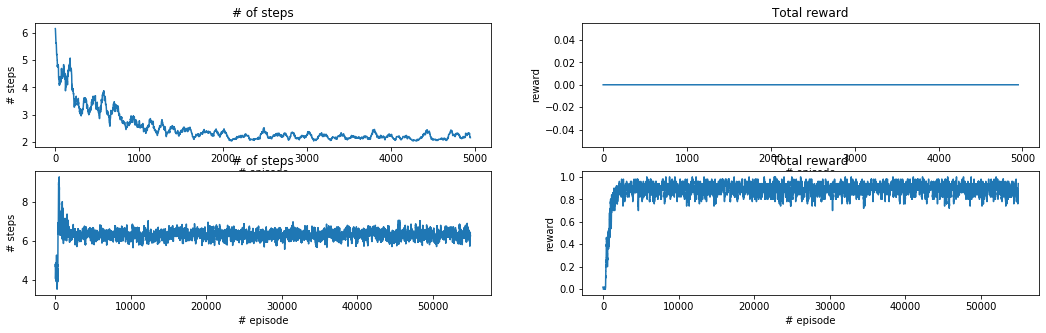

In [234]:
fig, ax = plt.subplots(2,2,figsize = (18,5))
ax[0,0].plot(movmean(steps_total,50)); ax[0,0].set_title('# of steps'); ax[0,0].set_xlabel('# episode'); ax[0,0].set_ylabel('# steps')
ax[0,1].plot(movmean(rewards_total,50)); ax[0,1].set_title('Total reward'); ax[0,1].set_xlabel('# episode'); ax[0,1].set_ylabel('reward')    


ax[1,0].plot(movmean(steps_total_inv,50)); ax[1,0].set_title('# of steps'); ax[1,0].set_xlabel('# episode'); ax[1,0].set_ylabel('# steps')
ax[1,1].plot(movmean(rewards_total_inv,50)); ax[1,1].set_title('Total reward'); ax[1,1].set_xlabel('# episode'); ax[1,1].set_ylabel('reward')    

#### Initialize Q-table

In [197]:
Q = pd.DataFrame(np.random.rand(n_states,n_actions)/1000)
Q.loc[15] = np.zeros(n_actions,)
#Q = restrict_actions(Q, n_states, n_rows)


In [198]:
epsilon = 0.8
epsilon_final = 0.1
epsilon_decay = 0.999
gamma = 0.90 # discount factor
learning_rate = 0.9 #how important is the difference between q-val from q-table and what's observed
num_episodes = 10000

terminal_state_inv, steps_total_inv, rewards_total_inv, epsilon_total_inv, Q = train_model(Q , env, num_episodes,  epsilon_final, epsilon , epsilon_decay ,  learning_rate,  gamma  )        


Episode: 0 Reward: 0.0 Steps Taken: 3 Terminal State: H, Epsilon: 0.7992
Episode: 10 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.7912438682636309
Episode: 20 Reward: 0.0 Steps Taken: 7 Terminal State: F, Epsilon: 0.7833669407717642
Episode: 30 Reward: 0.0 Steps Taken: 7 Terminal State: F, Epsilon: 0.7755684290366581
Episode: 40 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.7678475524200608
Episode: 50 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.7602035380550674
Episode: 60 Reward: 0.0 Steps Taken: 9 Terminal State: H, Epsilon: 0.7526356207687559
Episode: 70 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.7451430430055925
Episode: 80 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.7377250547515992
Episode: 90 Reward: 0.0 Steps Taken: 6 Terminal State: F, Epsilon: 0.7303809134592769
Episode: 100 Reward: 0.0 Steps Taken: 8 Terminal State: F, Epsilon: 0.7231098839732764
Episode: 110 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon

Episode: 970 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.30281616456009885
Episode: 980 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.29980159336747847
Episode: 990 Reward: 0.0 Steps Taken: 3 Terminal State: F, Epsilon: 0.29681703259219694
Episode: 1000 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.2938621834769546
Episode: 1010 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.2909367502386166
Episode: 1020 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.28804044003860463
Episode: 1030 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.28517296295358346
Episode: 1040 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.28233403194643947
Episode: 1050 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.27952336283754786
Episode: 1060 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.2767406742763261
Episode: 1070 Reward: 0.0 Steps Taken: 7 Terminal State: F, Epsilon: 0.27398568771307025
Episode: 1080 Reward: 0.0 

Episode: 1940 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.11473677367228365
Episode: 1950 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.11359455534602904
Episode: 1960 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.11246370794003893
Episode: 1970 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.11134411825543995
Episode: 1980 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.11023567422026707
Episode: 1990 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.10913826487824516
Episode: 2000 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.108051780377682
Episode: 2010 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.10697611196047219
Episode: 2020 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.1059111519512103
Episode: 2030 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.10485679374641242
Episode: 2040 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.10381293180384518
Episode: 2050 Reward: 1.

Episode: 2880 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2890 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2900 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2910 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2920 Reward: 0.0 Steps Taken: 6 Terminal State: F, Epsilon: 0.09994015273159322
Episode: 2930 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2940 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2950 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2960 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2970 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 2980 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2990 Reward:

Episode: 3830 Reward: 0.0 Steps Taken: 5 Terminal State: F, Epsilon: 0.09994015273159322
Episode: 3840 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3850 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3860 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3870 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3880 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3890 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3900 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3910 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3920 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3930 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3940 Reward:

Episode: 4780 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4790 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4800 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4810 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4820 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4830 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4840 Reward: 1.0 Steps Taken: 9 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4850 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4860 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4870 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4880 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4890 Reward:

Episode: 5720 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5730 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5740 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5750 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5760 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5770 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5780 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5790 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5800 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5810 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5820 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5830 Reward:

Episode: 6670 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6680 Reward: 1.0 Steps Taken: 9 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6690 Reward: 0.0 Steps Taken: 5 Terminal State: F, Epsilon: 0.09994015273159322
Episode: 6700 Reward: 0.0 Steps Taken: 5 Terminal State: F, Epsilon: 0.09994015273159322
Episode: 6710 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6720 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6730 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6740 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6750 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6760 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6770 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6780 Reward:

Episode: 7600 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7610 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7620 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7630 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7640 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7650 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7660 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7670 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7680 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7690 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7700 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7710 Reward:

Episode: 8550 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8560 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 8570 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8580 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8590 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8600 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8610 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8620 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 8630 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8640 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8650 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8660 Reward:

Episode: 9520 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9530 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9540 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9550 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9560 Reward: 0.0 Steps Taken: 5 Terminal State: F, Epsilon: 0.09994015273159322
Episode: 9570 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9580 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9590 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9600 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9610 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9620 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9630 Reward:

Text(0, 0.5, 'reward')

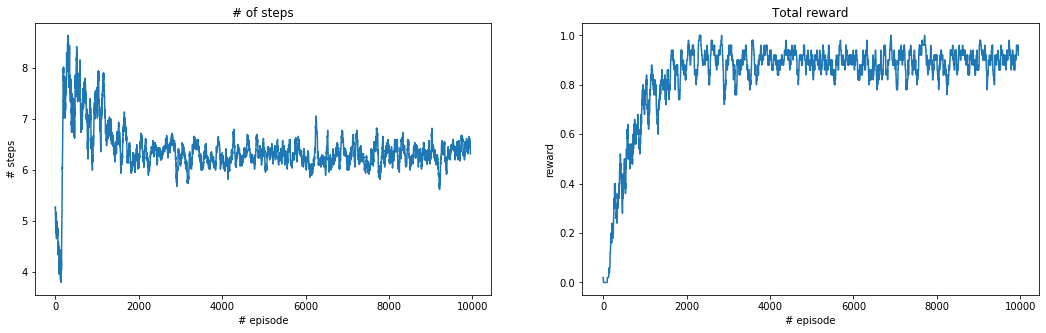

In [199]:
fig, ax = plt.subplots(1,2,sharex = True,figsize = (18,5))
ax[0].plot(movmean(steps_total,50)); ax[0].set_title('# of steps'); ax[0].set_xlabel('# episode'); ax[0].set_ylabel('# steps')
ax[1].plot(movmean(rewards_total,50)); ax[1].set_title('Total reward'); ax[1].set_xlabel('# episode'); ax[1].set_ylabel('reward')    

In [205]:
# Training again based on previous Q table - noisy environment (flipped locations)
Q_copy = Q.copy()
Q_copy = pd.DataFrame(np.random.rand(n_states,n_actions)/1000)
Q_copy.loc[15] = np.zeros(n_actions,)
#Q = restrict_actions(Q, n_states, n_rows)

env_inv = gym.make('FrozenLake-v1', is_slippery=False, desc = og_4x4_inv)

env_inv.reset()
# visualize 4x4 frozen lake
env_inv.render()
epsilon = 0.99#0.8
#epsilon = 0.2
epsilon_final = 0.4#0.1
epsilon_decay = 0.999
gamma = 0.90 # discount factor
learning_rate = 0.9 #how important is the difference between q-val from q-table and what's observed
num_episodes = 10000


terminal_state_inv, steps_total_inv, rewards_total_inv, epsilon_total_inv, Q = train_model(Q_copy,env_inv,num_episodes,  epsilon_final, epsilon , epsilon_decay ,  learning_rate,  gamma  )        

Episode: 0 Reward: 0.0 Steps Taken: 7 Terminal State: H, Epsilon: 0.98901
Episode: 10 Reward: 0.0 Steps Taken: 9 Terminal State: H, Epsilon: 0.9791642869762429
Episode: 20 Reward: 0.0 Steps Taken: 7 Terminal State: H, Epsilon: 0.969416589205058
Episode: 30 Reward: 0.0 Steps Taken: 10 Terminal State: H, Epsilon: 0.9597659309328644
Episode: 40 Reward: 0.0 Steps Taken: 11 Terminal State: H, Epsilon: 0.9502113461198253
Episode: 50 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.940751878343146
Episode: 60 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.9313865807013356
Episode: 70 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.9221145157194209
Episode: 80 Reward: 0.0 Steps Taken: 3 Terminal State: H, Epsilon: 0.9129347552551041
Episode: 90 Reward: 0.0 Steps Taken: 11 Terminal State: H, Epsilon: 0.9038463804058553
Episode: 100 Reward: 0.0 Steps Taken: 7 Terminal State: H, Epsilon: 0.8948484814169296
Episode: 110 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsil

Episode: 960 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 970 Reward: 0.0 Steps Taken: 12 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 980 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 990 Reward: 0.0 Steps Taken: 9 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 1000 Reward: 0.0 Steps Taken: 8 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 1010 Reward: 1.0 Steps Taken: 9 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 1020 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 1030 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 1040 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 1050 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 1060 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 1070 Reward: 0.0 Steps Ta

Episode: 1910 Reward: 1.0 Steps Taken: 9 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 1920 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 1930 Reward: 1.0 Steps Taken: 11 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 1940 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 1950 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 1960 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 1970 Reward: 1.0 Steps Taken: 11 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 1980 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 1990 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 2000 Reward: 0.0 Steps Taken: 9 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 2010 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 2020 Reward: 1.0 S

Episode: 2860 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 2870 Reward: 1.0 Steps Taken: 12 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 2880 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 2890 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 2900 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 2910 Reward: 0.0 Steps Taken: 7 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 2920 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 2930 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 2940 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 2950 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 2960 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 2970 Reward: 1.0 Steps

Episode: 3800 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 3810 Reward: 0.0 Steps Taken: 9 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 3820 Reward: 1.0 Steps Taken: 9 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 3830 Reward: 1.0 Steps Taken: 16 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 3840 Reward: 0.0 Steps Taken: 3 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 3850 Reward: 0.0 Steps Taken: 8 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 3860 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 3870 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 3880 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 3890 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 3900 Reward: 1.0 Steps Taken: 19 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 3910 Reward: 1.0 Step

Episode: 4750 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 4760 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 4770 Reward: 0.0 Steps Taken: 7 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 4780 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 4790 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 4800 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 4810 Reward: 1.0 Steps Taken: 11 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 4820 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 4830 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 4840 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 4850 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 4860 Reward: 1.0 Steps

Episode: 5700 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 5710 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 5720 Reward: 1.0 Steps Taken: 13 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 5730 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 5740 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 5750 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 5760 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 5770 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 5780 Reward: 0.0 Steps Taken: 7 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 5790 Reward: 0.0 Steps Taken: 9 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 5800 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 5810 Reward: 1.0 Step

Episode: 6630 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 6640 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 6650 Reward: 0.0 Steps Taken: 3 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 6660 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 6670 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 6680 Reward: 0.0 Steps Taken: 8 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 6690 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 6700 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 6710 Reward: 1.0 Steps Taken: 12 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 6720 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 6730 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 6740 Reward: 0.0 Ste

Episode: 7600 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 7610 Reward: 0.0 Steps Taken: 8 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 7620 Reward: 0.0 Steps Taken: 3 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 7630 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 7640 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 7650 Reward: 1.0 Steps Taken: 11 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 7660 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 7670 Reward: 0.0 Steps Taken: 10 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 7680 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 7690 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 7700 Reward: 0.0 Steps Taken: 12 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 7710 Reward: 1.0 S

Episode: 8540 Reward: 1.0 Steps Taken: 11 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 8550 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 8560 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 8570 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 8580 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 8590 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 8600 Reward: 1.0 Steps Taken: 17 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 8610 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 8620 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 8630 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 8640 Reward: 0.0 Steps Taken: 7 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 8650 Reward: 1.0 Step

Episode: 9490 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 9500 Reward: 1.0 Steps Taken: 9 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 9510 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 9520 Reward: 0.0 Steps Taken: 15 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 9530 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 9540 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 9550 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 9560 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.3999148465827568
Episode: 9570 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 9580 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 9590 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.3999148465827568
Episode: 9600 Reward: 1.0 Steps

In [157]:
# Training again based on previous Q table - noisy environment (flipped locations)
Q_copy = Q.copy()
Q_copy = pd.DataFrame(np.random.rand(n_states,n_actions)/1000)
Q_copy.loc[15] = np.zeros(n_actions,)
#Q = restrict_actions(Q, n_states, n_rows)

env_inv = gym.make('FrozenLake-v1', is_slippery=False, desc = og_4x4_inv)

env_inv.reset()
# visualize 4x4 frozen lake
env_inv.render()
epsilon = 0.8
#epsilon = 0.2
epsilon_final = 0.1
epsilon_decay = 0.999
gamma = 0.90 # discount factor
learning_rate = 0.9 #how important is the difference between q-val from q-table and what's observed
num_episodes = 10000
steps_total_inv = [] # store number of steps taken in each episode
rewards_total_inv = [] #store reward obtained for each episode
epsilon_total_inv = [] #store epsilon obtained at the end of each episode
terminal_state_inv = []
for i_episode in range(num_episodes):
    
    # resets the environment
    state = env_inv.reset()
    step = 0
    #reward = 0

  ## as epsilon decays with more timesteps, the prob. of selecting a random val < e decays --> more likely to exploit. 
    if epsilon > epsilon_final:
            epsilon *= epsilon_decay

    while True:
        
        step += 1
        
        random_for_epsilon = np.random.rand()
        if random_for_epsilon <= epsilon:
          action = env_inv.action_space.sample()
        else: 
          action = np.argmax(Q_copy.loc[state])
  
         
        ## env gives reward and next state and whether we've reached terminal state upon taking action at current state.. 
        new_state, reward , done, info = env_inv.step(action)

        ##if you want reward penalized at for each timestep
        #reward = rewarder(new_state, reward)

        # filling the Q Table - 
        
        Q_copy.loc[state, action] = (1- learning_rate)*Q_copy.at[state, action] + learning_rate*(reward + gamma * np.max(Q_copy.loc[new_state]))
        
        # Setting new state for next action
        state = new_state
        tile = og_4x4_inv[rowsandcols(state)[0]][rowsandcols(state)[1]]
        #env.render()
        
        if done:
          #print(Q)
          
          terminal_state_inv.append(tile)
          steps_total_inv.append(step)
          rewards_total_inv.append(reward)
          epsilon_total_inv.append(epsilon)
          if i_episode % 10 == 0:
            print('Episode: {} Reward: {} Steps Taken: {} Terminal State: {}, Epsilon: {}'.format(i_episode,reward, step, tile, epsilon))
          break


        

Episode: 0 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.7992
Episode: 10 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.7912438682636309
Episode: 20 Reward: 0.0 Steps Taken: 19 Terminal State: H, Epsilon: 0.7833669407717642
Episode: 30 Reward: 0.0 Steps Taken: 3 Terminal State: H, Epsilon: 0.7755684290366581
Episode: 40 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.7678475524200608
Episode: 50 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.7602035380550674
Episode: 60 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.7526356207687559
Episode: 70 Reward: 0.0 Steps Taken: 7 Terminal State: H, Epsilon: 0.7451430430055925
Episode: 80 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.7377250547515992
Episode: 90 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.7303809134592769
Episode: 100 Reward: 0.0 Steps Taken: 8 Terminal State: H, Epsilon: 0.7231098839732764
Episode: 110 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilo

Episode: 970 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.30281616456009885
Episode: 980 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.29980159336747847
Episode: 990 Reward: 0.0 Steps Taken: 8 Terminal State: H, Epsilon: 0.29681703259219694
Episode: 1000 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.2938621834769546
Episode: 1010 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.2909367502386166
Episode: 1020 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.28804044003860463
Episode: 1030 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.28517296295358346
Episode: 1040 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.28233403194643947
Episode: 1050 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.27952336283754786
Episode: 1060 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.2767406742763261
Episode: 1070 Reward: 1.0 Steps Taken: 14 Terminal State: G, Epsilon: 0.27398568771307025
Episode: 1080 Reward: 0.0 

Episode: 1900 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.11942166023695906
Episode: 1910 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.1182328033037494
Episode: 1920 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.11705578158372329
Episode: 1930 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.11589047725591577
Episode: 1940 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.11473677367228365
Episode: 1950 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.11359455534602904
Episode: 1960 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.11246370794003893
Episode: 1970 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.11134411825543995
Episode: 1980 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.11023567422026707
Episode: 1990 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.10913826487824516
Episode: 2000 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.108051780377682
Episode: 2010 Reward: 1.

Episode: 2840 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2850 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2860 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2870 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 2880 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2890 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2900 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2910 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2920 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2930 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2940 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2950 Reward

Episode: 3820 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3830 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3840 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3850 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3860 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3870 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3880 Reward: 1.0 Steps Taken: 11 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3890 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 3900 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3910 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3920 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3930 Rewar

Episode: 4790 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4800 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4810 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4820 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4830 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4840 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4850 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4860 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4870 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4880 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4890 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4900 Reward:

Episode: 5730 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5740 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5750 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5760 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5770 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5780 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5790 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5800 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 5810 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5820 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5830 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5840 Reward:

Episode: 6680 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 6690 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6700 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6710 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6720 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6730 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6740 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6750 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6760 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6770 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 6780 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6790 Reward:

Episode: 7640 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7650 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 7660 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7670 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7680 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7690 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 7700 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7710 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7720 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 7730 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7740 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7750 Reward:

Episode: 8580 Reward: 1.0 Steps Taken: 9 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8590 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8600 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 8610 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8620 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 8630 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8640 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8650 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8660 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8670 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8680 Reward: 1.0 Steps Taken: 9 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8690 Reward:

Episode: 9550 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 9560 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9570 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9580 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9590 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9600 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9610 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9620 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 9630 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9640 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9650 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9660 Reward:

Text(0, 0.5, 'reward')

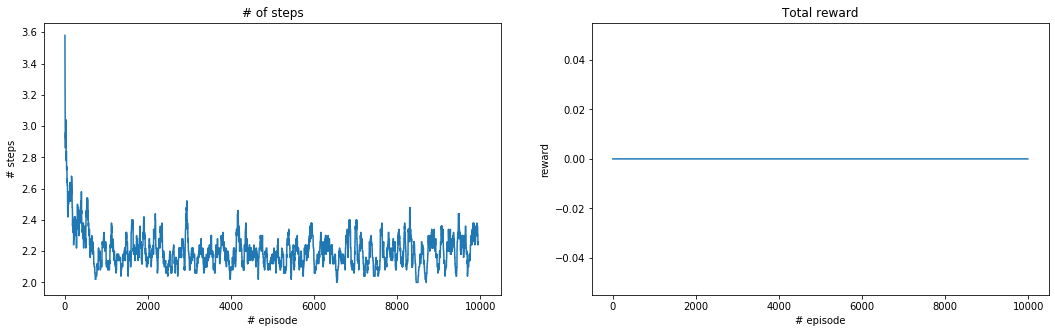

In [135]:
   
fig, ax = plt.subplots(1,2,sharex = True,figsize = (18,5))
ax[0].plot(movmean(steps_total_inv,50)); ax[0].set_title('# of steps'); ax[0].set_xlabel('# episode'); ax[0].set_ylabel('# steps')
ax[1].plot(movmean(rewards_total_inv,5)); ax[1].set_title('Total reward'); ax[1].set_xlabel('# episode'); ax[1].set_ylabel('reward')    

In [57]:
np.array(og_4x4)

array(['SFFF', 'FHFH', 'FFFH', 'HFFG'], dtype='<U4')

In [56]:
np.hstack(og_4x4)

array(['SFFF', 'FHFH', 'FFFH', 'HFFG'], dtype='<U4')

In [17]:
## Noisy Secenario (noisy rewards)

In [ ]:
## noisy environment (switches between locations over learning)

In [ ]:
## discrete changes in the environments over the iterations ->

In [ ]:
 ## 2 transfer learninig and then back to 1

In [25]:
## bigger env that include the former one

In [ ]:
## smaller env that is a part of the former one

In [129]:
# plt.axhline(y=6, color='green', linestyle='-')
# plt.bar(np.arange(0, 1000), steps_total, 
#         width = 0.4, color = 'blue')
# plt.xlabel('episode index')
# plt.ylabel('number of steps taken')
# plt.title(' Restricted 4x4 Negative Rewards')
# plt.show()

In [124]:
Q

,0,1,2,3
0,0.531441,0.590490,0.478297,0.531441
1,0.531441,0.000876,0.430467,0.478297
2,0.478297,0.387407,0.313935,0.430466
3,0.426170,0.000737,0.000675,0.000682
4,0.590490,0.656100,0.000876,0.531441
5,0.000332,0.000900,0.000743,0.000973
6,0.000876,0.810000,0.000738,0.430467
7,0.000090,0.000415,0.000820,0.000331
8,0.656100,0.000653,0.729000,0.590490
9,0.656100,0.810000,0.810000,0.000876


In [130]:
# plt.scatter(np.arange(0, 1000), rewards_total, s = 0.5, color = 'blue')
# plt.title('Restricted 4x4 Negative Rewards')
# plt.xlabel('episode')
# plt.ylabel('reward')

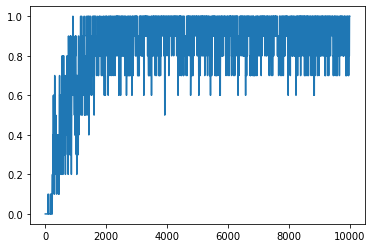

In [127]:
plt.plot([np.mean(rewards_total[i:i+10]) for i in range(len(rewards_total)-1)])

In [154]:

# steps_total = [] # store number of steps taken in each episode
# rewards_total = [] #store reward obtained for each episode
# epsilon_total = [] #store epsilon obtained at the end of each episode
# terminal_state = []

In [155]:
# for i_episode in range(num_episodes):
    
#     # resets the environment
#     state = env.reset()
#     step = 0
#     #reward = 0

#   ## as epsilon decays with more timesteps, the prob. of selecting a random val < e decays --> more likely to exploit. 
#     if epsilon > epsilon_final:
#             epsilon *= epsilon_decay

#     while True:
        
#         step += 1
        
#         random_for_epsilon = np.random.rand()
#         if random_for_epsilon <= epsilon:
#           action = env.action_space.sample()
#         else: 
#           action = np.argmax(Q.loc[state])
  
         
#         ## env gives reward and next state and whether we've reached terminal state upon taking action at current state.. 
#         new_state, reward , done, info = env.step(action)

#         ##if you want reward penalized at for each timestep
#         #reward = rewarder(new_state, reward)

#         # filling the Q Table - 
        
#         Q.loc[state, action] = (1- learning_rate)*Q.at[state, action] + learning_rate*(reward + gamma * np.max(Q.loc[new_state]))
        
#         # Setting new state for next action
#         state = new_state
#         tile = og_4x4[rowsandcols(state)[0]][rowsandcols(state)[1]]
#         #env.render()
        
#         if done:
#           #print(Q)
          
#           terminal_state.append(tile)
#           steps_total.append(step)
#           rewards_total.append(reward)
#           epsilon_total.append(epsilon)
#           if i_episode % 10 == 0:
#             print('Episode: {} Reward: {} Steps Taken: {} Terminal State: {}, Epsilon: {}'.format(i_episode,reward, step, tile, epsilon))
#           break


        

Episode: 0 Reward: 0.0 Steps Taken: 8 Terminal State: H, Epsilon: 0.7992
Episode: 10 Reward: 0.0 Steps Taken: 3 Terminal State: H, Epsilon: 0.7912438682636309
Episode: 20 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.7833669407717642
Episode: 30 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.7755684290366581
Episode: 40 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.7678475524200608
Episode: 50 Reward: 0.0 Steps Taken: 10 Terminal State: H, Epsilon: 0.7602035380550674
Episode: 60 Reward: 0.0 Steps Taken: 3 Terminal State: H, Epsilon: 0.7526356207687559
Episode: 70 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.7451430430055925
Episode: 80 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.7377250547515992
Episode: 90 Reward: 0.0 Steps Taken: 10 Terminal State: H, Epsilon: 0.7303809134592769
Episode: 100 Reward: 0.0 Steps Taken: 3 Terminal State: H, Epsilon: 0.7231098839732764
Episode: 110 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsil

Episode: 980 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.29980159336747847
Episode: 990 Reward: 1.0 Steps Taken: 11 Terminal State: G, Epsilon: 0.29681703259219694
Episode: 1000 Reward: 1.0 Steps Taken: 13 Terminal State: G, Epsilon: 0.2938621834769546
Episode: 1010 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.2909367502386166
Episode: 1020 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.28804044003860463
Episode: 1030 Reward: 0.0 Steps Taken: 7 Terminal State: H, Epsilon: 0.28517296295358346
Episode: 1040 Reward: 1.0 Steps Taken: 9 Terminal State: G, Epsilon: 0.28233403194643947
Episode: 1050 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.27952336283754786
Episode: 1060 Reward: 0.0 Steps Taken: 9 Terminal State: H, Epsilon: 0.2767406742763261
Episode: 1070 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.27398568771307025
Episode: 1080 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.2712581273710722
Episode: 1090 Reward: 1.0

Episode: 1920 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.11705578158372329
Episode: 1930 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.11589047725591577
Episode: 1940 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.11473677367228365
Episode: 1950 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.11359455534602904
Episode: 1960 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.11246370794003893
Episode: 1970 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.11134411825543995
Episode: 1980 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.11023567422026707
Episode: 1990 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.10913826487824516
Episode: 2000 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.108051780377682
Episode: 2010 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.10697611196047219
Episode: 2020 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.1059111519512103
Episode: 2030 Reward: 1

Episode: 2890 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 2900 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2910 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2920 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 2930 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2940 Reward: 0.0 Steps Taken: 5 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 2950 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2960 Reward: 0.0 Steps Taken: 2 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 2970 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2980 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 2990 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3000 Reward

Episode: 3880 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3890 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3900 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3910 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3920 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3930 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3940 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3950 Reward: 1.0 Steps Taken: 10 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3960 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3970 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3980 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 3990 Reward

Episode: 4840 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4850 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4860 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4870 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4880 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4890 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4900 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4910 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4920 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4930 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 4940 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 4950 Reward:

Episode: 5770 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5780 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5790 Reward: 1.0 Steps Taken: 9 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5800 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5810 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 5820 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 5830 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5840 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5850 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5860 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5870 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 5880 Reward:

Episode: 6700 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6710 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 6720 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6730 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6740 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6750 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6760 Reward: 1.0 Steps Taken: 9 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6770 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6780 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6790 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6800 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 6810 Reward:

Episode: 7660 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7670 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7680 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7690 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7700 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7710 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7720 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7730 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7740 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7750 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7760 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 7770 Reward:

Episode: 8670 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8680 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8690 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 8700 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8710 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8720 Reward: 0.0 Steps Taken: 6 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 8730 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8740 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8750 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8760 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8770 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 8780 Reward:

Episode: 9650 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9660 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9670 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9680 Reward: 1.0 Steps Taken: 9 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9690 Reward: 1.0 Steps Taken: 7 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9700 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 9710 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9720 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9730 Reward: 0.0 Steps Taken: 4 Terminal State: H, Epsilon: 0.09994015273159322
Episode: 9740 Reward: 1.0 Steps Taken: 6 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9750 Reward: 1.0 Steps Taken: 8 Terminal State: G, Epsilon: 0.09994015273159322
Episode: 9760 Reward: